In [163]:
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [164]:
n = 10
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

Рассчет с использованием интерсепта:

In [165]:
B1_1 = (np.mean(zp * ks) - (np.mean(zp) * np.mean(ks))) / (np.mean(zp**2) - np.mean(zp) ** 2)
B1_1

2.620538882402765

In [166]:
A1 = np.mean(ks) - B1_1 * np.mean(zp)
A1

444.1773573243596

использование матричного метода:

In [167]:
x1 = zp.reshape(len(zp), 1)
y1 = ks.reshape(len(ks), 1)
X1 = np.hstack([np.ones((10,1)), x1])
X1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [168]:
B1_1_1 = np.dot(np.linalg.inv(np.dot(X1.T,X1)),X1.T@y1)
B1_1_1

array([[444.17735732],
       [  2.62053888]])

In [169]:
y_hat1_ = A1 + (B1_1 * zp)
y_hat1_

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [170]:
#Среднеквадратичная ошибка
mse1 = ((ks - y_hat1_) ** 2).sum()/n
mse1

6470.414201176658

__средняя ошибка аппроксимации__ вычисляется по формуле:
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$


Если $\overline{A}$ не превышает $8$-$10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [171]:

A_mean = 100 * np.mean(np.abs((ks - y_hat1_) / ks))
print(f'{round(A_mean,1)}%')

11.5%


In [172]:
df = pd.DataFrame({'zp': zp, 'ks': ks, 'y_hat1_': y_hat1_}, columns=['zp', 'ks', 'y_hat1_'])
df = df.sort_values('zp')


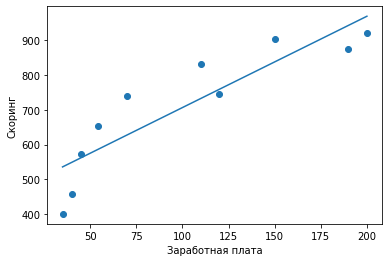

In [173]:
plt.scatter(df['zp'], df['ks'])
plt.plot(df['zp'], df['y_hat1_'])
plt.xlabel('Заработная плата')
plt.ylabel('Скоринг')
plt.show()

расчет без использования интерсепта:

In [174]:
B1_2 = np.mean(ks) / np.mean(zp)
B1_2

7.000986193293885

In [175]:
y_hat2 = B1_2 * zp
y_hat2

array([ 245.03451677,  315.0443787 , 1330.18737673, 1400.19723866,
        280.03944773,  490.06903353,  378.05325444, 1050.14792899,
        840.1183432 ,  770.10848126])

использование матричного метода:

In [176]:
x2 = zp.reshape(len(zp), 1)
y2 = ks.reshape(len(ks), 1)
B1_2_1 = np.dot(np.linalg.inv(np.dot(x2.T,x2)),x2.T@y2)
B1_2_1

array([[5.88982042]])

In [177]:
y_hat20 = B1_2_1[0] * zp
y_hat20

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

In [178]:
#Среднеквадратичная ошибка
mse2 = ((ks - y_hat20) ** 2).sum()/n
mse2

56516.8584157194

In [179]:
df1 = pd.DataFrame({'zp': zp, 'ks': ks, 'y_hat20': y_hat20}, columns=['zp', 'ks', 'y_hat20'])
df1 = df1.sort_values('zp')


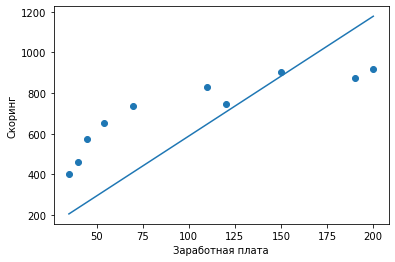

In [180]:
plt.scatter(df1['zp'], df1['ks'])
plt.plot(df1['zp'], df1['y_hat20'])
plt.xlabel('Заработная плата')
plt.ylabel('Скоринг')
plt.show()

2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

In [181]:
alpha = 1e-6
alpha

1e-06

In [182]:
B1 = 0.1
for i in range(2000):
    B1 -= alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i%200 == 0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=np.mean((B1*zp-ks)**2)))

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 200, B1=5.868748638669329, mse=56522.97550129376
Iteration: 400, B1=5.8897415574471985, mse=56516.85850140053
Iteration: 600, B1=5.889820124983314, mse=56516.85841572062
Iteration: 800, B1=5.88982041902807, mse=56516.8584157194
Iteration: 1000, B1=5.8898204201285544, mse=56516.85841571941
Iteration: 1200, B1=5.889820420132673, mse=56516.85841571943
Iteration: 1400, B1=5.889820420132673, mse=56516.85841571943
Iteration: 1600, B1=5.889820420132673, mse=56516.85841571943
Iteration: 1800, B1=5.889820420132673, mse=56516.85841571943


3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [209]:
alpha = 3e-6
alpha

3e-06

In [210]:
def mse_(B0, B1, y, x, n):
    return np.sum((B0+B1*x-y)**2)/n

n = 10
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

B0 = 0.1
B1 = 0.2


In [212]:
for i in range(4000000):
    y_pred = B0 + B1*x
    B0 -= alpha * (2/n) * np.sum(y_pred-y)
    B1 -= alpha * (2/n) * np.sum((y_pred-y)*x)
    if i % 500000 == 0:
        print('B0={B0}, B1={B1}, mse={mse}'.format(B0=B0, B1=B1, mse=mse_(B0, B1, y, x, n)))

B0=439.5583563083346, B1=2.6545367720583672, mse=6475.826185259248
B0=442.019265607246, B1=2.6364233915878788, mse=6471.595609947732
B0=443.1690527487027, B1=2.6279604498766607, mse=6470.6720967401025
B0=443.7062568103147, B1=2.6240063904716378, mse=6470.4704984746595
B0=443.9572495318372, B1=2.622158973070975, mse=6470.426490592264
B0=444.0745184632728, B1=2.621295821888036, mse=6470.4168838939695
B0=444.12930890575984, B1=2.620892540007085, mse=6470.414786800289
B0=444.15490812076223, B1=2.620704118466605, mse=6470.41432901534
